In [1]:
from qiskit import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

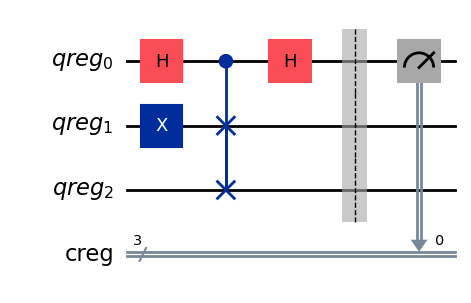

In [2]:
qreg = QuantumRegister(3, 'qreg')
creg = ClassicalRegister(3, 'creg')
qc = QuantumCircuit (qreg,creg)

#Initial state |01>
qc.x(qreg[1])

#swap_test
qc.h(qreg[0]) #apply superposition on the auxiliary qubit
qc.cswap(qreg[0], qreg[1], qreg[2])
qc.h(qreg[0]) 

qc.barrier()
qc.measure(qreg[0],creg[0])

display(qc.draw(output="mpl"))

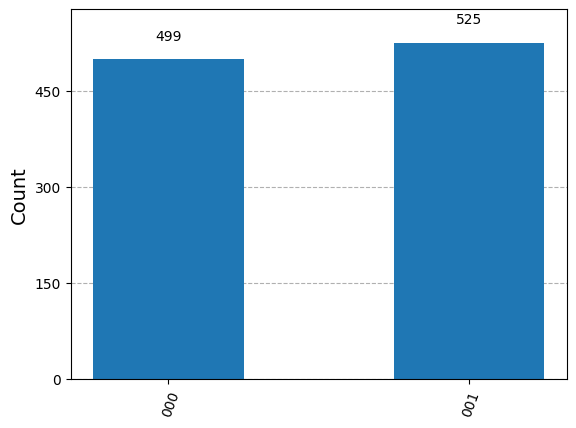

In [3]:
#simulasi
#m membuat simulator
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()

from qiskit import transpile
new = transpile(qc, aer_sim)

job = aer_sim.run(new)

# mengecek hasil
result = job.result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)



# quantum euclidian distance

In [4]:
#Import the necessary libraries
import math as m
from qiskit import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [5]:
import math as m

A = [2, 9, 8, 5]
B = [7, 5, 10, 3]

norm_A = 0 
norm_B = 0
Dist = 0

for i in range(len(A)):
    norm_A += A[i]**2
    norm_B += B[i]**2
    Dist += (A[i] - B[i]) ** 2  # Gunakan '-' untuk selisih

Dist = m.sqrt(Dist)
A_norm = m.sqrt(norm_A)
B_norm = m.sqrt(norm_B)
Z = round(A_norm ** 2 + B_norm ** 2)  # Pastikan variabel ditulis benar

# Membuat phi dan psi state dengan data
phi = [A_norm / m.sqrt(Z), -B_norm / m.sqrt(Z)]
psi = []
for i in range(len(A)):
    psi.append((A[i] / A_norm) / m.sqrt(2))
    psi.append((B[i] / B_norm) / m.sqrt(2))

print("Phi state:", phi)
print("Psi state:", psi)
print("Distance:", Dist)


Phi state: [0.6981367759853317, -0.7159644139318704]
Psi state: [0.10721125348377947, 0.3658958614425217, 0.4824506406770076, 0.2613541867446583, 0.42884501393511787, 0.5227083734893166, 0.2680281337094487, 0.156812512046795]
Distance: 7.0


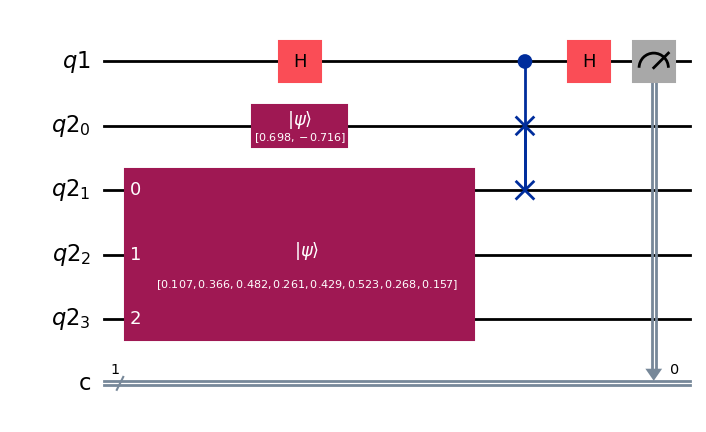

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Quantum Registers
q1 = QuantumRegister(1, name='q1')  # Register 1 qubit
q2 = QuantumRegister(4, name='q2')  # Register 4 qubits
c = ClassicalRegister(1, name='c')  # Classical Register for measurement
qc = QuantumCircuit(q1, q2, c)  # Quantum Circuit with the registers

# States initialization
qc.initialize(phi, q2[0])  # Initialize phi state on the first qubit of q2
qc.initialize(psi, q2[1:4])  # Initialize psi state on the second, third, and fourth qubits of q2

# The swap test operator
qc.h(q1[0])  # Apply X gate on the first qubit of q1

# Swap test
qc.cswap(q1[0], q2[0], q2[1])  # Apply controlled swap (CSWAP) between q1[0] and q2[0], q2[1]
qc.h(q1[0])  # Apply Hadamard gate on q1[0] again
qc.measure(q1[0], c[0])  # Measure q1[0] into classical register

# Visualize the circuit
display(qc.draw(output="mpl"))


In [36]:
#simulasi
#m membuat simulator
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()

from qiskit import transpile
new = transpile(qc, aer_sim)

job = aer_sim.run(new, shots=30000)

# mengecek hasil
shots = 30000
job_result = job.result()
counts = job_result.get_counts(qc)
x = abs(((counts['0']/shots - 0.5)/0.5) * 2 * Z)
Q_Dist = round(m.sqrt(x),4)
print('Quantum Distance: ', round(Q_Dist,3))
print('Euclidean Distance: ',round(Dist,3))


Quantum Distance:  7.053
Euclidean Distance:  7.0


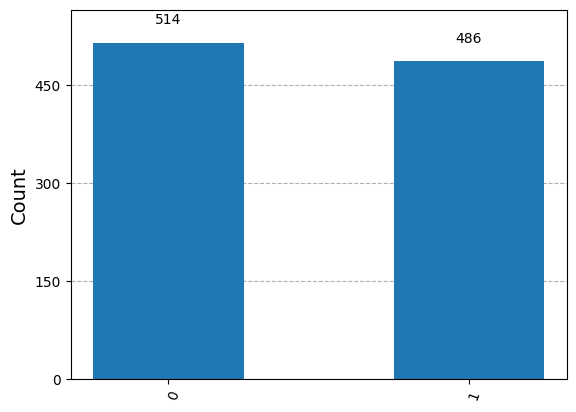

In [14]:
plot_histogram(counts)